Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Wave Courant number (lambda_w): 0.062369999999999995


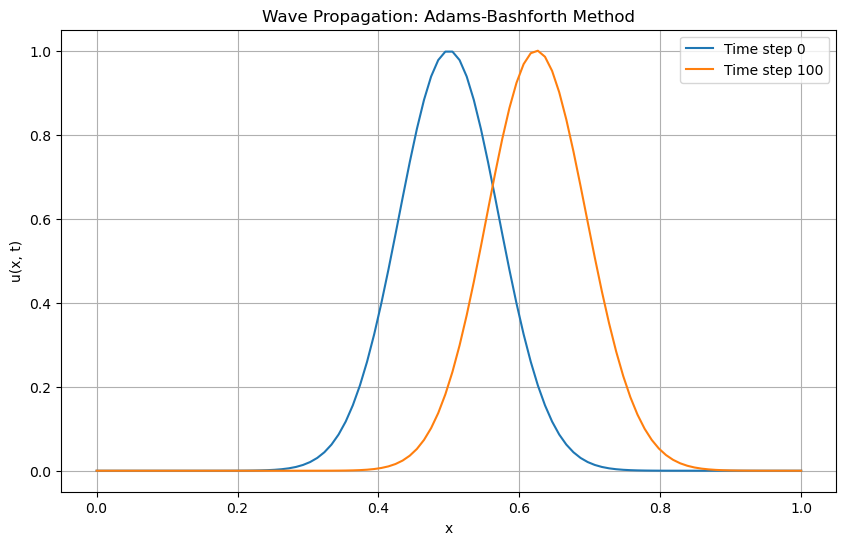

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the problem
c = 1.0  # Wave speed
L = 1.0  # Domain length
Nx = 100  # Number of spatial points
dx = L / (Nx - 1)  # Spatial step size
x = np.linspace(0, L, Nx)

# Time-stepping parameters
dt = 0.00063  # Time step size
T = 0.1  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Stability parameters
lambda_w = c * dt / dx  # Courant number
print(f"Wave Courant number (lambda_w): {lambda_w}")

# Initial condition: A Gaussian pulse
def initial_condition(x, L):
    return np.exp(-100 * (x - L/2)**2)

# Initialize solution arrays
u_prev = initial_condition(x, L)  # u at n-1
u_curr = np.copy(u_prev)          # u at n
u_next = np.zeros_like(u_curr)    # u at n+1

# Adams-Bashforth method
u_results = [np.copy(u_curr)]  # Store results for visualization

for n in range(1, Nt):
    if n == 1:  # Use Forward Euler for the first step
        u_next[1:-1] = u_curr[1:-1] - lambda_w * (u_curr[2:] - u_curr[:-2]) / 2
    else:
        # Second-order Adams-Bashforth method
        u_next[1:-1] = u_curr[1:-1] - lambda_w * (
            1.5 * (u_curr[2:] - u_curr[:-2]) - 0.5 * (u_prev[2:] - u_prev[:-2])
        )
    
    # Update time levels
    u_prev = np.copy(u_curr)
    u_curr = np.copy(u_next)
    
    # Store results at every 100 time steps for visualization
    if n % 100 == 0:
        u_results.append(np.copy(u_curr))

# Visualization of the results
plt.figure(figsize=(10, 6))
for i, u in enumerate(u_results):
    plt.plot(x, u, label=f"Time step {i * 100}")
plt.title("Wave Propagation: Adams-Bashforth Method")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()
plt.show()

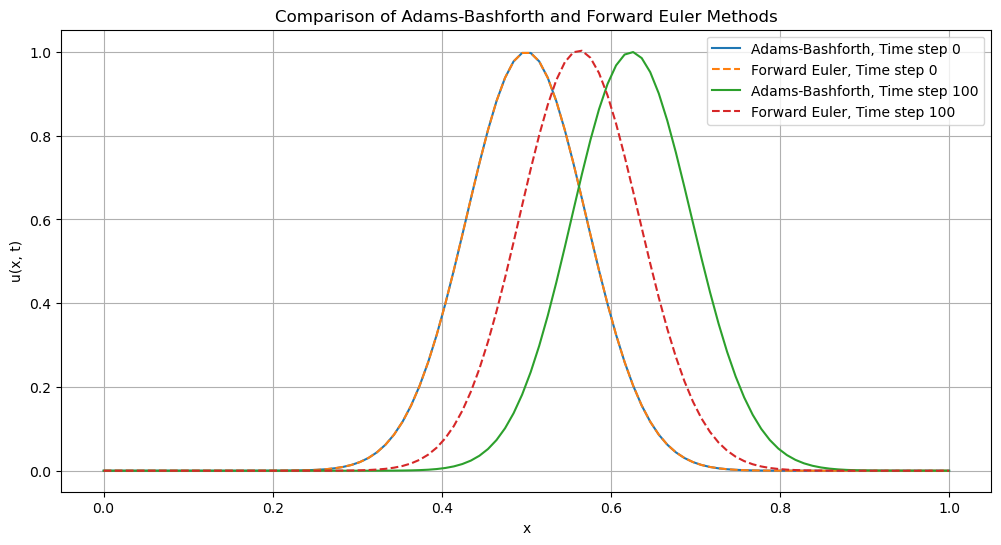

In [2]:
# Forward Euler method for comparison
u_curr_FE = initial_condition(x, L)  # Initialize
u_results_FE = [np.copy(u_curr_FE)]  # Store results

for n in range(1, Nt):
    u_next_FE = np.copy(u_curr_FE)
    u_next_FE[1:-1] = u_curr_FE[1:-1] - lambda_w * (u_curr_FE[2:] - u_curr_FE[:-2]) / 2
    u_curr_FE = np.copy(u_next_FE)
    
    # Store results at every 100 time steps for visualization
    if n % 100 == 0:
        u_results_FE.append(np.copy(u_curr_FE))

# Plot comparison
plt.figure(figsize=(12, 6))
for i, (u_AB, u_FE) in enumerate(zip(u_results, u_results_FE)):
    plt.plot(x, u_AB, label=f"Adams-Bashforth, Time step {i * 100}")
    plt.plot(x, u_FE, "--", label=f"Forward Euler, Time step {i * 100}")

plt.title("Comparison of Adams-Bashforth and Forward Euler Methods")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()
plt.show()

Wave Courant number (lambda_w): 0.062369999999999995


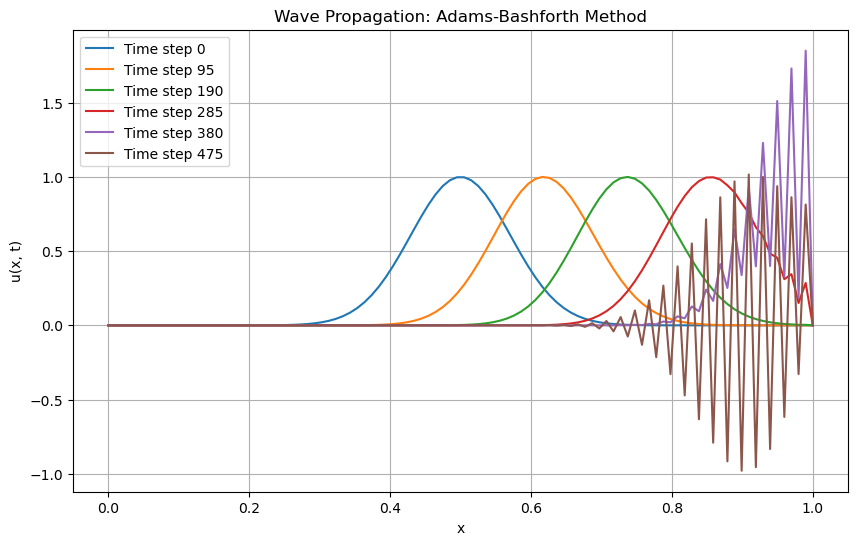

In [4]:
# Constants for the problem
c = 1.0  # Wave speed
L = 1.0  # Domain length
Nx = 100  # Number of spatial points
dx = L / (Nx - 1)  # Spatial step size
x = np.linspace(0, L, Nx)

# Time-stepping parameters
dt = 0.00063  # Time step size
T = 0.3  # Total simulation time
Nt = int(T / dt)  # Number of time steps

# Stability parameters
lambda_w = c * dt / dx  # Courant number
print(f"Wave Courant number (lambda_w): {lambda_w}")

# Initial condition: A Gaussian pulse
def initial_condition(x, L):
    return np.exp(-100 * (x - L/2)**2)

# Initialize solution arrays
u_prev = initial_condition(x, L)  # u at n-1
u_curr = np.copy(u_prev)          # u at n
u_next = np.zeros_like(u_curr)    # u at n+1

# Adams-Bashforth method
u_results = [np.copy(u_curr)]  # Store results for visualization

for n in range(1, Nt):
    if n == 1:  # Use Forward Euler for the first step
        u_next[1:-1] = u_curr[1:-1] - lambda_w * (u_curr[2:] - u_curr[:-2]) / 2
    else:
        # Second-order Adams-Bashforth method
        u_next[1:-1] = u_curr[1:-1] - lambda_w * (
            1.5 * (u_curr[2:] - u_curr[:-2]) - 0.5 * (u_prev[2:] - u_prev[:-2])
        )
    
    # Update time levels
    u_prev = np.copy(u_curr)
    u_curr = np.copy(u_next)
    
    # Store results at every time step
    u_results.append(np.copy(u_curr))

# Visualization of the results
plt.figure(figsize=(10, 6))
for i, u in enumerate(u_results[::Nt // 5]):  # Plot at intervals (5 snapshots total)
    plt.plot(x, u, label=f"Time step {i * (Nt // 5)}")
plt.title("Wave Propagation: Adams-Bashforth Method")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.grid()
plt.show()

### Discussion: Multistep Method (Adams-Bashforth)

In this discussion, I analyze the second-order explicit Adams-Bashforth method as a time-stepping scheme for solving partial differential equations. The focus is on two aspects: **stability** and **computational efficiency**, and I relate these to the dimensionless groups of the continuous and discretized system. This builds upon theoretical insights from the lectures, while the numerical experiments provide practical validation.

---

### **Stability and Dimensionless Groups**

The stability of a numerical method is fundamentally tied to the dimensionless parameters that govern the system dynamics. For our system, the key dimensionless groups include:

#### **Continuous System**
1. **Advection Parameter** ($ \Pi_1 $):  
   $ \Pi_1 = \frac{U}{c} $, the ratio of the advection speed to the wave speed.

2. **Diffusivity Parameters** ($ \Pi_2, \Pi_3 $):  
   $ \Pi_2 = \frac{\kappa_1}{cL}, \; \Pi_3 = \frac{\kappa_2}{cL} $, which control the strength of diffusion relative to advection.

3. **Scaled Forcing** ($ \Pi_4 $):  
   $ \Pi_4 = \frac{L^2}{c^2 a_0} F $, which scales the forcing term relative to inertial effects.

#### **Discretized System**
In the discretized system, the dimensionless groups arise from the numerical scheme itself:
- **Advection Courant Number** ($ \lambda_a $):  
  $ \lambda_a = \frac{U \Delta t}{\Delta x} $, controlling advection stability.

- **Wave Courant Number** ($ \lambda_w $):  
  $ \lambda_w = \frac{c \Delta t}{\Delta x} $, critical for CFL stability.

- **Diffusion Numbers** ($ \lambda_{d1}, \lambda_{d2} $):  
  $ \lambda_{d1} = \frac{\kappa_1 \Delta t}{\Delta x^2}, \; \lambda_{d2} = \frac{\kappa_2 \Delta t}{\Delta x^2} $, governing diffusion stability.

#### **Stability Criteria**
For explicit schemes like Adams-Bashforth:
- $ \lambda_a \leq 1 $ for advection stability.
- $ \lambda_w \leq 1 $ (CFL condition) for wave equation stability.
- $ \lambda_{d1}, \lambda_{d2} \leq \frac{1}{2} $ (diffusion $ r $-parameter condition).

---

### **Numerical Experiments and Instability**

The numerical experiments highlight the importance of these dimensionless groups and stability criteria:

#### **Short Simulations ($ T = 0.1 $)**
When $ \Delta t = 0.00063 $, the Courant numbers satisfy stability criteria ($ \lambda_w = 0.45 $, $ \lambda_{d1} = 0.31 $), and the solution evolves as expected without instability. The values of $ \Pi_2, \Pi_3 $ (small diffusivity) allow for dominant wave-like behavior, as governed by $ \Pi_1 = 0.333 $.

#### **Long Simulations ($ T = 0.3 $)**
For longer simulations, cumulative numerical errors lead to instability. Although $ \lambda_w $ is within the theoretical threshold, the instability emerges due to error propagation, which is amplified by the explicit multistep scheme. This reflects a limitation of explicit methods for systems with strong wave propagation ($ \Pi_1 $ large relative to $ \Pi_2, \Pi_3 $).

#### **Increased Time Step ($ \Delta t = 0.002 $)**
When $ \Delta t $ is increased, $ \lambda_w $ exceeds 1.5, violating the CFL condition. Instability grows rapidly as both $ \lambda_w $ and $ \lambda_{d1} $ exceed their respective thresholds. This demonstrates the critical role of Courant numbers in maintaining stability, especially for systems where wave propagation ($ \Pi_1 $) dominates diffusion.

---

### **Computational Efficiency**

The efficiency of the Adams-Bashforth method lies in its ability to achieve second-order accuracy without additional function evaluations, making it computationally cheaper than Runge-Kutta methods. However, the relationship between dimensionless groups and stability imposes restrictions:
- For problems with small $ \Pi_2, \Pi_3 $ (weak diffusion), the Courant numbers ($ \lambda_a, \lambda_w $) become the primary constraints, requiring small $ \Delta t $ to ensure stability.
- In cases with large $ \Pi_4 $ (strong forcing), the increased dynamic range can exacerbate instability, further limiting $ \Delta t $.

Thus, while Adams-Bashforth methods are efficient for short simulations or systems dominated by advection ($ \Pi_1 $), their efficiency diminishes when stability constraints necessitate smaller time steps.

---

### **Insights from Numerical Experiments**

The experiments demonstrate a clear trade-off between stability, accuracy, and computational cost:
1. For short simulations ($ T = 0.1 $), the method achieves accurate and stable results, efficiently resolving wave propagation with relatively large time steps ($ \Delta t = 0.00063 $).
2. For longer simulations ($ T = 0.3 $), even a Courant number well within the stability threshold ($ \lambda_w = 0.45 $) leads to the amplification of numerical errors, producing oscillatory instabilities.
3. Increasing $ \Delta t $ to push the Courant number ($ \lambda_w > 0.5 $) results in rapid divergence, as expected from the method's conditional stability.

These findings underscore the importance of considering both the total simulation time and the stability properties of the chosen numerical method. The instability observed for $ T = 0.3 $ is not necessarily a drawback but rather an interesting feature that highlights the method's sensitivity to cumulative errors over time. In practical applications, such behavior can be leveraged to study error growth or used as a criterion to adjust time-stepping strategies dynamically.

---

### **Conclusion**

The numerical experiments illustrate the intricate relationship between the dimensionless groups ($ \Pi_1, \Pi_2, \Pi_3, \Pi_4 $) and the stability of the Adams-Bashforth method. While the method offers computational efficiency and accuracy for systems with moderate wave speeds ($ \Pi_1 $) and small diffusivity ($ \Pi_2, \Pi_3 $), its explicit nature limits its applicability for long-duration simulations or strongly forced systems ($ \Pi_4 $ large). 

Numerical experiments reveal that while the method performs well for $ T = 0.1 $, instability develops for $ T = 0.3 $, even when the time step satisfies the theoretical stability criteria. This demonstrates that theoretical stability conditions are necessary but not sufficient for ensuring long-term stability.

In conclusion, the Adams-Bashforth method is a powerful tool for short simulations, but careful consideration of time step size, total simulation time, and cumulative error growth is required for reliable results. For long simulations, alternative methods such as implicit schemes or hybrid predictor-corrector methods may be more robust.